In [9]:
# Core imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

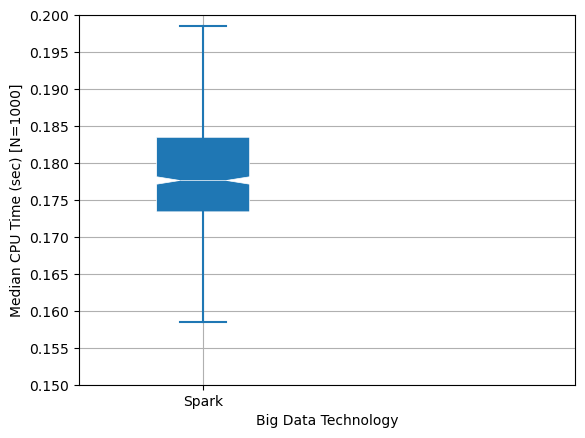

In [37]:
timeData = pd.read_csv(r'Masters_Project_Time_MASTER.csv', header=None)

fig, ax = plt.subplots()
VP = ax.boxplot(timeData, positions=[2], widths=1.5, patch_artist=True, notch=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})

ax.set(xlim=(0, 8), xticks=np.array([2]), ylim=(.15, .2), yticks=np.arange(.15, .20, .005 ))
plt.ylabel("Median CPU Time (sec) [N=1000]")
plt.xlabel("Big Data Technology")
ax.set_xticklabels(["Spark"])
plt.grid()
plt.savefig('SparkTimeData.png', bbox_inches="tight")
plt.show()

In [42]:
median = np.median(timeData,0)
print(median)

[0.1776305]


In [12]:
#np.mean(timeData,0)

In [13]:
timeData.shape

(1000, 1)

In [14]:
np.sqrt(timeData.shape[0])

31.622776601683793

In [15]:
stderr = np.std(timeData,0) / np.sqrt(timeData.shape[0])
stderr

0    0.000253
dtype: float64

In [16]:
stderr*1.96

0    0.000497
dtype: float64

In [40]:
memoryData = pd.read_csv(r'Masters_Project_Memory_MASTER.csv', header=None)
memoryData = pd.DataFrame(memoryData)

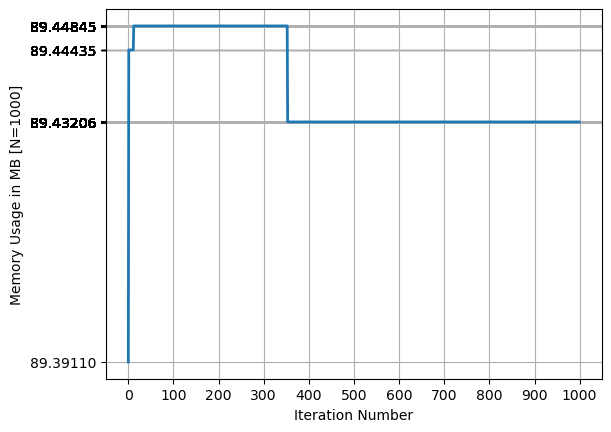

In [44]:
fig, ax = plt.subplots()
runsList = []
for i in range(1000):
    runsList.append(i)
ax.plot(runsList, memoryData, linewidth=2.0)
ax.set(yticks=np.array(memoryData))
ax.set(xticks=np.arange(0, 1100, 100))
plt.ylabel("Memory Usage in MB [N=1000]")
plt.xlabel("Iteration Number")
plt.grid()
plt.savefig('SparkMemoryData.png', bbox_inches="tight")
plt.show()

In [39]:
memoryIterationPerValue = [0, 0, 0, 0]

for i in range (1000):
    if memoryData.iat[i,0] == 89.391104:
        memoryIterationPerValue[0] += 1
    elif memoryData.iat[i,0] == 89.444352:
        memoryIterationPerValue[1] += 1
    elif memoryData.iat[i,0] == 89.448448:
        memoryIterationPerValue[2] += 1
    elif memoryData.iat[i,0] == 89.432064:
        memoryIterationPerValue[3] += 1
        
print(memoryIterationPerValue)

[1, 11, 341, 647]


In [43]:
print("Upper bound is: ", median + (stderr*1.96))
print("Lower bound is: ", median - (stderr*1.96))

Upper bound is:  0    0.178127
dtype: float64
Lower bound is:  0    0.177134
dtype: float64
